In [1]:
import pandas as pd

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SANGAVI\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [3]:
data = pd.read_csv("CoronaTweetsSentimentAnalysis.csv",encoding='latin1')

In [4]:
df = pd.DataFrame(data)

In [5]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
2,3,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low price...,Positive
4,5,44967,"Washington, DC",04-03-2020,While we were busy watching election returns a...,Positive


In [6]:
plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

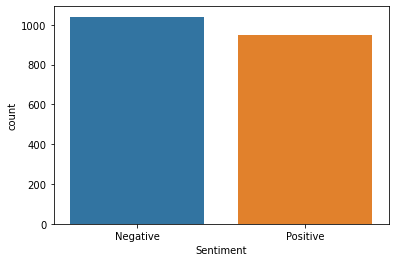

In [19]:
sns.countplot(x='Sentiment', data=df, order=[ 'Negative','Positive'], )

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       1988 non-null   int64 
 1   ScreenName     1988 non-null   int64 
 2   Location       1536 non-null   object
 3   TweetAt        1988 non-null   object
 4   OriginalTweet  1988 non-null   object
 5   Sentiment      1988 non-null   object
dtypes: int64(2), object(4)
memory usage: 93.3+ KB


In [9]:
reg = re.compile("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z t])|(w+://S+)")
tweet = []
for i in df["OriginalTweet"]:
    tweet.append(reg.sub(" ", i))
df = pd.concat([df, pd.DataFrame(tweet, columns=["CleanedTweet"])], axis=1, sort=False)

In [10]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,CleanedTweet
0,1,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,When I couldn t find hand sanitizer at Fred Me...
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,buying hits City as anxious shoppers stock...
2,3,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive,Voting in the age of hand sanitizer ht...
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low price...,Positive,Best quality couches at unbelievably low price...
4,5,44967,"Washington, DC",04-03-2020,While we were busy watching election returns a...,Positive,While we were busy watching election returns a...


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
stop_words = set(stopwords.words('english'))     # make a set of stopwords
vectoriser = TfidfVectorizer(stop_words=None)

In [12]:
X_train = vectoriser.fit_transform(df["CleanedTweet"])
# Encoding the classes in numerical values
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(df['Sentiment'])
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [14]:
# importing the Test dataset for prediction and testing purposes
test_data = pd.read_csv("CoronaTweetsSentimentAnalysis.csv",encoding='latin1')
test_df = pd.DataFrame(test_data)
test_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
2,3,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low price...,Positive
4,5,44967,"Washington, DC",04-03-2020,While we were busy watching election returns a...,Positive


In [16]:
reg1 = re.compile("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z t])|(w+://S+)")
tweet = []
for i in test_df["OriginalTweet"]:
    tweet.append(reg1.sub(" ", i))
test_df = pd.concat([test_df, pd.DataFrame(tweet, columns=["CleanedTweet"])], axis=1, sort=False)
test_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,CleanedTweet
0,1,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,When I couldn t find hand sanitizer at Fred Me...
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,buying hits City as anxious shoppers stock...
2,3,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive,Voting in the age of hand sanitizer ht...
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low price...,Positive,Best quality couches at unbelievably low price...
4,5,44967,"Washington, DC",04-03-2020,While we were busy watching election returns a...,Positive,While we were busy watching election returns a...


In [17]:
X_test = vectoriser.transform(test_df["CleanedTweet"])
y_test = encoder.transform(test_df["Sentiment"])
# Prediction
y_pred = classifier.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df.head()

,Actual,Predicted
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1


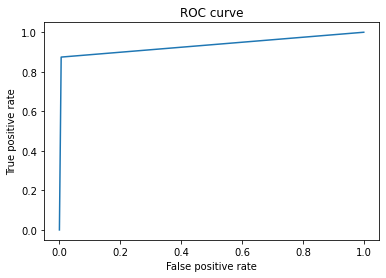

AUC of the predictions: 0.9342881661792586


In [18]:
from sklearn import metrics
# Generate the roc curve using scikit-learn.
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()
# Measure the area under the curve. The closer to 1, the "better" the predictions.
print("AUC of the predictions: {0}".format(metrics.auc(fpr, tpr)))